In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_excel('E:/Code/STAT3013.-P12_Nhom4/Dataset/Platinum_data_filtered.xlsx')

In [3]:

# Add an 'index' column explicitly to use as a feature, starting from 1
df['index'] = df.index + 1

In [4]:
# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())

        date        open        high         low       close  volume  index
0 2019-03-01  861.599976  861.599976  861.599976  861.599976       0      1
1 2019-03-04  836.799988  836.799988  836.799988  836.799988       0      2
2 2019-03-05  840.200012  840.200012  835.900024  835.900024       2      3
3 2019-03-06  828.299988  828.400024  826.200012  826.200012       2      4
4 2019-03-07  825.000000  825.000000  815.299988  815.299988       4      5
date      0
open      0
high      0
low       0
close     0
volume    0
index     0
dtype: int64


In [5]:
# Normalize the 'index' column to improve model performance
scaler = StandardScaler()
df['index_normalized'] = scaler.fit_transform(df[['index']])

In [6]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
index                        int64
index_normalized           float64
dtype: object



SPLITING DATA 7-2-1


In [7]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [9]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [11]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1328      1094.419172
1    1329      1094.583351
2    1330      1094.747530
3    1331      1094.911708
4    1332      1095.075887
5    1333      1095.240066
6    1334      1095.404245
7    1335      1095.568424
8    1336      1095.732603
9    1337      1095.896781
10   1338      1096.060960
11   1339      1096.225139
12   1340      1096.389318
13   1341      1096.553497
14   1342      1096.717676
15   1343      1096.881854
16   1344      1097.046033
17   1345      1097.210212
18   1346      1097.374391
19   1347      1097.538570
20   1348      1097.702749
21   1349      1097.866927
22   1350      1098.031106
23   1351      1098.195285
24   1352      1098.359464
25   1353      1098.523643
26   1354      1098.687821
27   1355      1098.852000
28   1356      1099.016179
29   1357      1099.180358


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 82.41114224875129
RMSE: 108.25164151204437
MAPE: 0.08603225699718006

Test Set Performance:
MAE: 89.36602678754747
RMSE: 107.91501626842016
MAPE: 0.09609297359475037

Validation Set Performance:
MAE: 137.53038748466008
RMSE: 145.18693197538153
MAPE: 0.14827019171861425


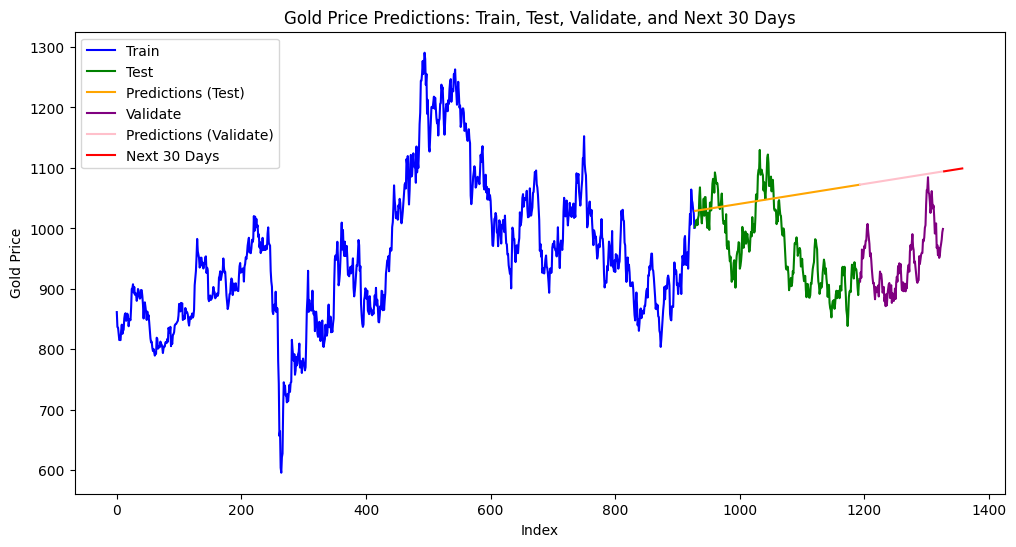

In [13]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


Margin of Error: 2.7851876928243784
Lower Bound of Future Prediction: [1091.63398425 1091.79816308 1091.96234191 1092.12652073 1092.29069956
 1092.45487839 1092.61905722 1092.78323605 1092.94741488 1093.11159371
 1093.27577254 1093.43995137 1093.6041302  1093.76830902 1093.93248785
 1094.09666668 1094.26084551 1094.42502434 1094.58920317 1094.753382
 1094.91756083 1095.08173966 1095.24591848 1095.41009731 1095.57427614
 1095.73845497 1095.9026338  1096.06681263 1096.23099146 1096.39517029]
Upper Bound of Future Prediction: [1097.20435963 1097.36853846 1097.53271729 1097.69689612 1097.86107495
 1098.02525378 1098.18943261 1098.35361144 1098.51779027 1098.68196909
 1098.84614792 1099.01032675 1099.17450558 1099.33868441 1099.50286324
 1099.66704207 1099.8312209  1099.99539973 1100.15957855 1100.32375738
 1100.48793621 1100.65211504 1100.81629387 1100.9804727  1101.14465153
 1101.30883036 1101.47300919 1101.63718801 1101.80136684 1101.96554567]
Confidence Score: 0.9949212467365455


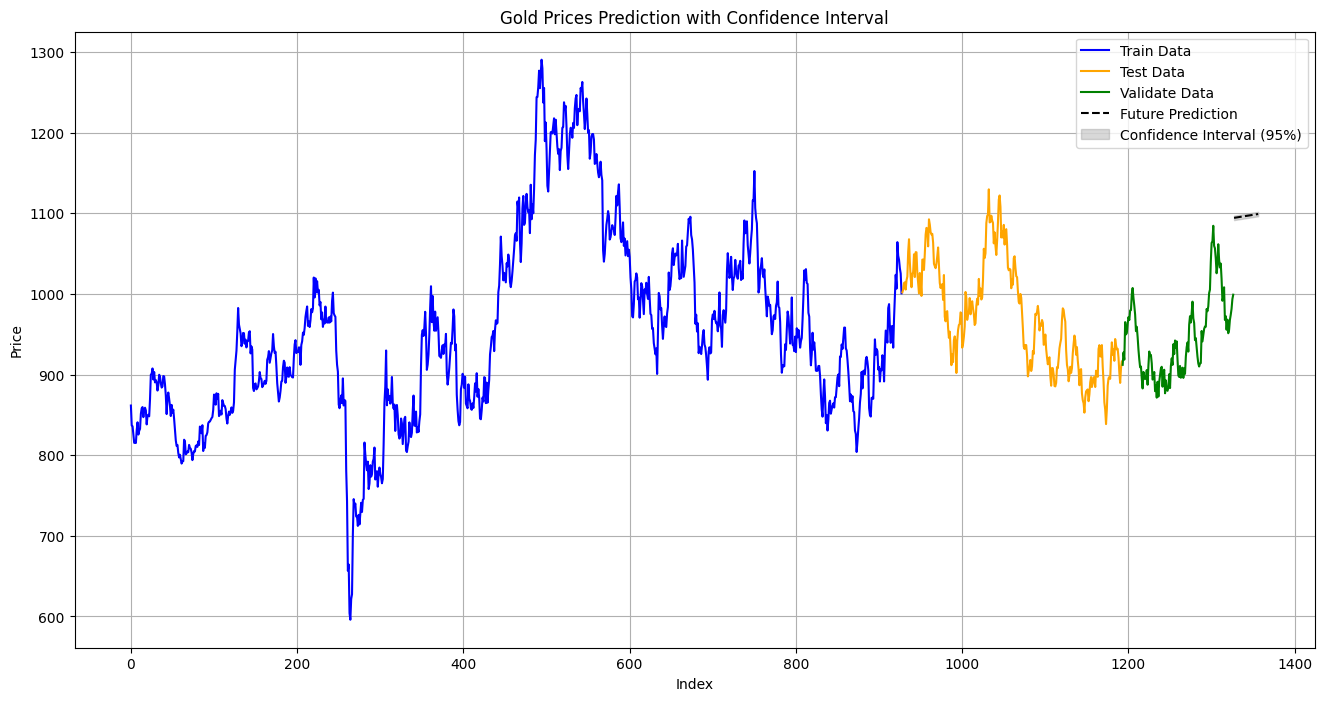

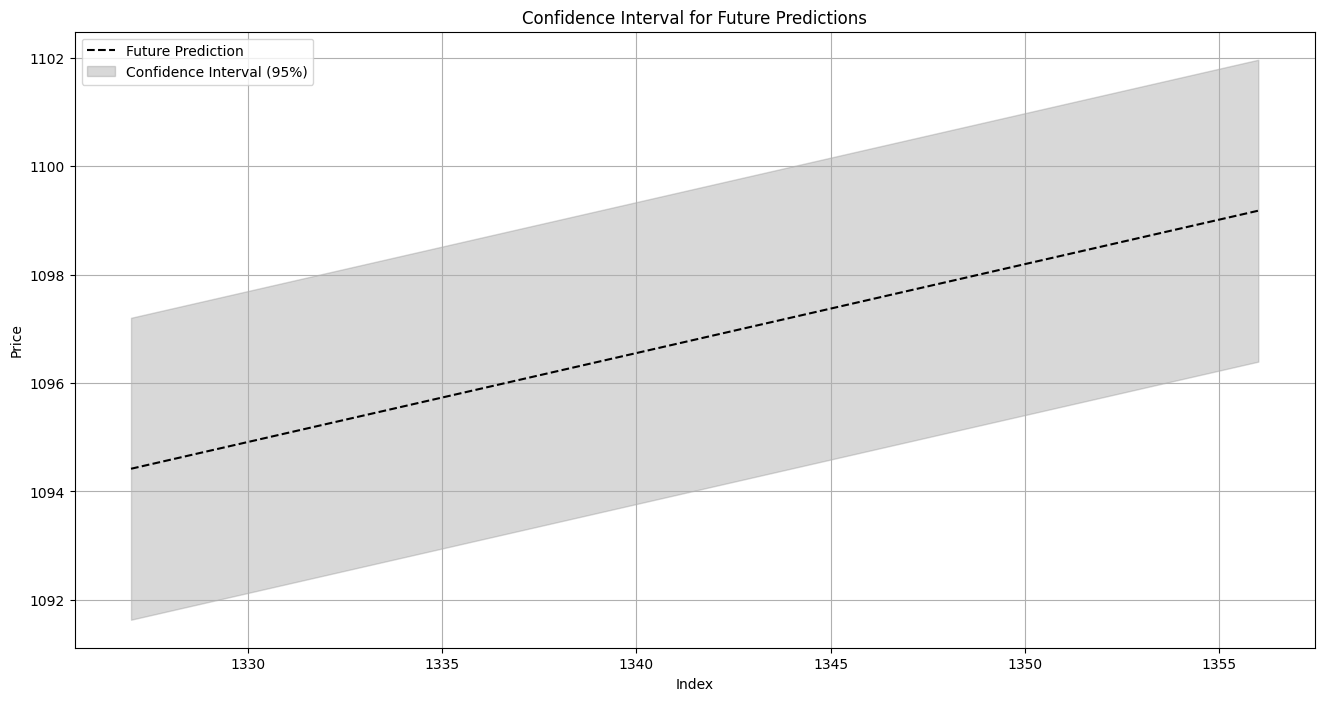

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tạo khoảng tin cậy cho dự đoán tương lai (30 ngày tiếp theo)
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Giá trị Z cho mức độ tin cậy 95%

# Sử dụng y_pred_future là giá trị dự đoán cho 30 ngày tiếp theo
y_pred_future = next_30_days['predicted_close'].values

# Độ lệch chuẩn của dự đoán tương lai
std_dev = np.std(y_pred_future)
margin_of_error = z_score * std_dev

# Tính khoảng tin cậy
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# In ra giá trị khoảng tin cậy
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Tính Confidence Score
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Cập nhật chỉ số index của next_30_days để nối tiếp tập val_data
last_index = val_data.index.max()  # Chỉ số cuối cùng của tập xác thực
next_30_days.index = range(last_index + 1, last_index + 1 + len(next_30_days))

# Tạo DataFrame khoảng tin cậy
PREDICTIONS_FUTURE = next_30_days.copy()
PREDICTIONS_FUTURE['lower_bound'] = lower_bound
PREDICTIONS_FUTURE['upper_bound'] = upper_bound

# Vẽ biểu đồ với khoảng tin cậy
plt.figure(figsize=(16, 8))

# Plot dữ liệu tập huấn luyện, kiểm tra, xác thực
plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')
plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')
plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot dự đoán tương lai
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['predicted_close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot khoảng tin cậy
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['lower_bound'], PREDICTIONS_FUTURE['upper_bound'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Thêm tiêu đề và chú thích
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ riêng cho khoảng tin cậy
plt.figure(figsize=(16, 8))

# Plot dự đoán tương lai
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['predicted_close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot khoảng tin cậy
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['lower_bound'], PREDICTIONS_FUTURE['upper_bound'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Thêm tiêu đề và chú thích
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend()
plt.grid()
plt.show()



In [15]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     69.61
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.79e-16
Time:                        22:46:40   Log-Likelihood:                -8007.9
No. Observations:                1327   AIC:                         1.602e+04
Df Residuals:                    1325   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.0017      5.549    165.075      0.0

I. Analyze Residuals (7:2:1)

1. Residual Plot

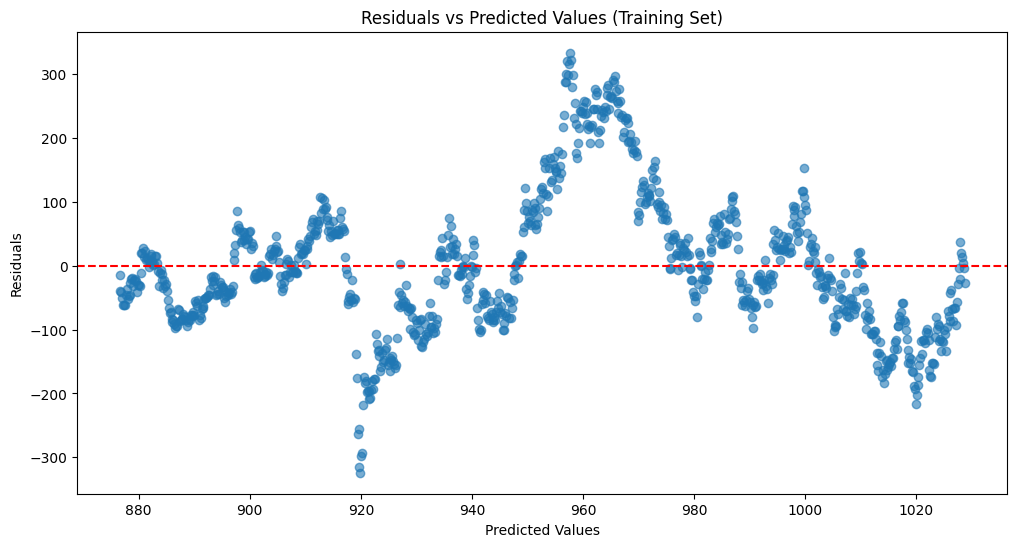

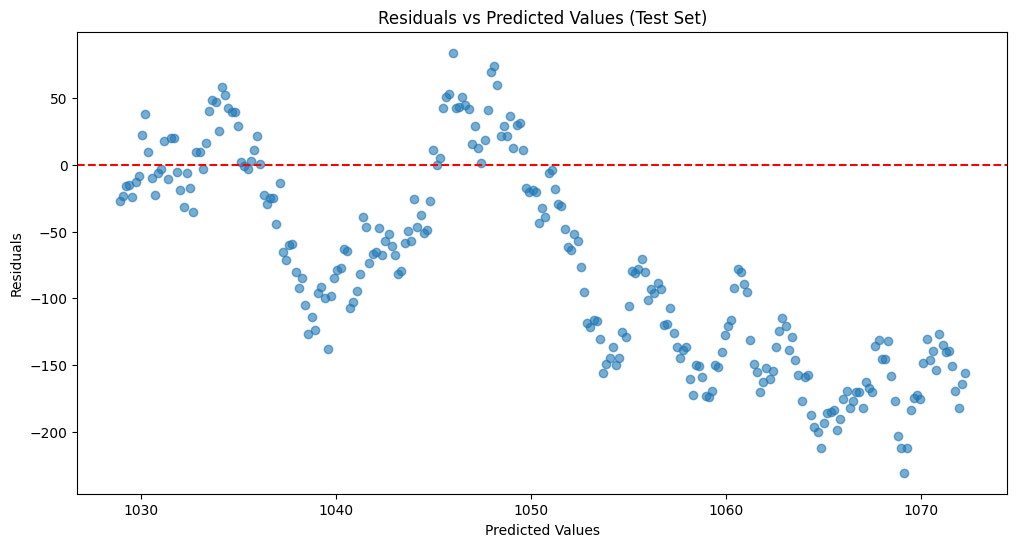

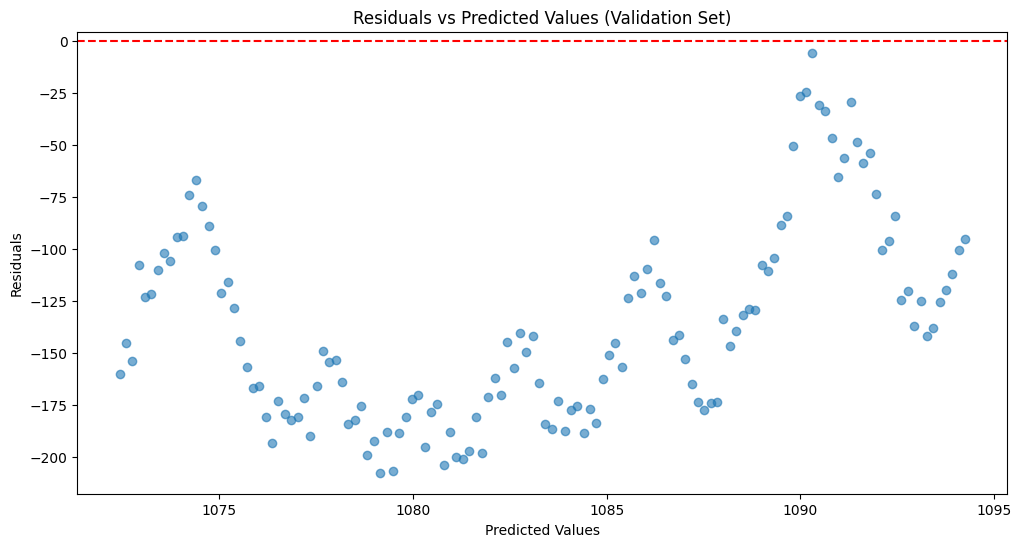

In [16]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOT

<Figure size 800x600 with 0 Axes>

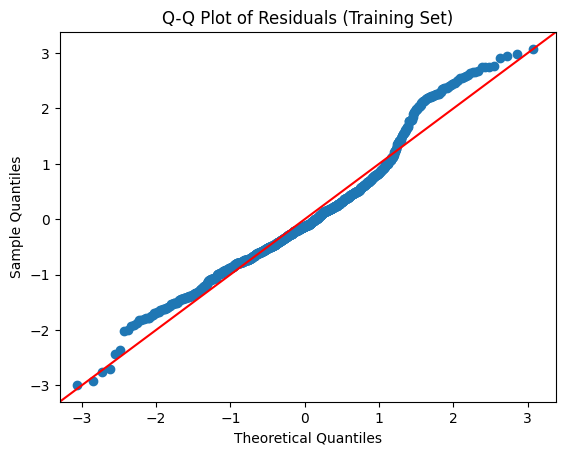

<Figure size 800x600 with 0 Axes>

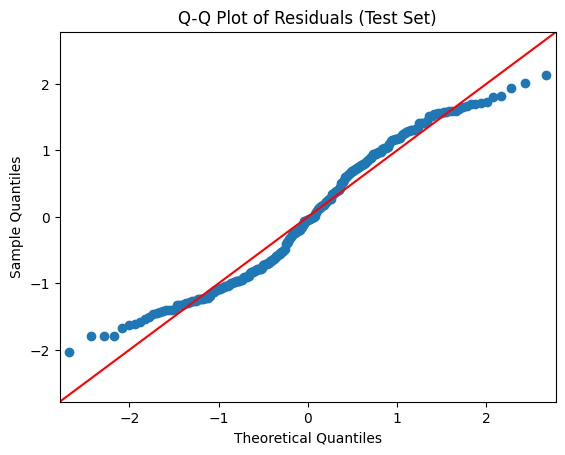

<Figure size 800x600 with 0 Axes>

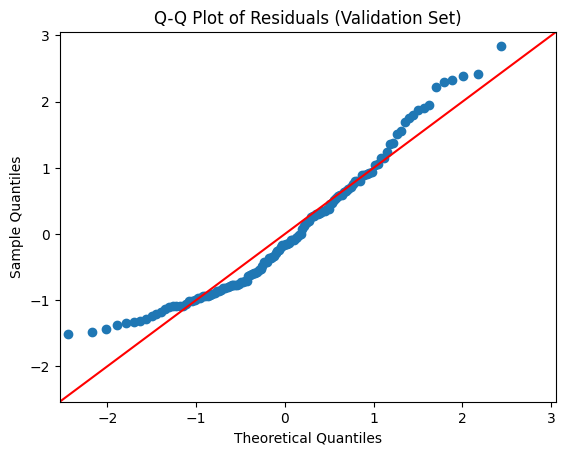

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [18]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.03294936020909107
Durbin-Watson statistic (Test Set): 0.023943559679007062
Durbin-Watson statistic (Validation Set): 0.011118217887420106


SPLITING DATA 6-3-1

In [19]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [20]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [21]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [22]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [23]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1328      1246.736447
1    1329      1247.046630
2    1330      1247.356814
3    1331      1247.666998
4    1332      1247.977181
5    1333      1248.287365
6    1334      1248.597549
7    1335      1248.907732
8    1336      1249.217916
9    1337      1249.528100
10   1338      1249.838283
11   1339      1250.148467
12   1340      1250.458651
13   1341      1250.768834
14   1342      1251.079018
15   1343      1251.389202
16   1344      1251.699385
17   1345      1252.009569
18   1346      1252.319753
19   1347      1252.629936
20   1348      1252.940120
21   1349      1253.250304
22   1350      1253.560487
23   1351      1253.870671
24   1352      1254.180855
25   1353      1254.491038
26   1354      1254.801222
27   1355      1255.111406
28   1356      1255.421589
29   1357      1255.731773


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 76.62714533657318
RMSE: 100.59989456955671
MAPE: 0.07976572925413283

Test Set Performance:
MAE: 188.82299105737863
RMSE: 203.42241978019334
MAPE: 0.2035927722150277

Validation Set Performance:
MAE: 279.89399333311474
RMSE: 283.4413145894284
MAPE: 0.2989737627800974


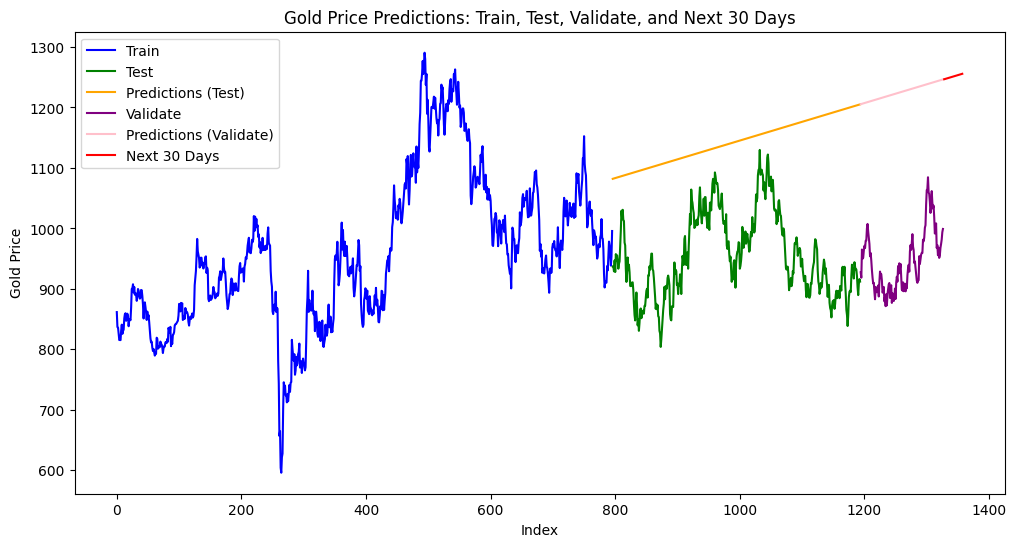

In [25]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


Margin of Error: 5.2620654044938755
Lower Bound of Future Prediction: [1241.47438134 1241.78456501 1242.09474867 1242.40493234 1242.71511601
 1243.02529968 1243.33548335 1243.64566702 1243.95585069 1244.26603435
 1244.57621802 1244.88640169 1245.19658536 1245.50676903 1245.8169527
 1246.12713636 1246.43732003 1246.7475037  1247.05768737 1247.36787104
 1247.67805471 1247.98823838 1248.29842204 1248.60860571 1248.91878938
 1249.22897305 1249.53915672 1249.84934039 1250.15952405 1250.46970772]
Upper Bound of Future Prediction: [1251.99851215 1252.30869582 1252.61887948 1252.92906315 1253.23924682
 1253.54943049 1253.85961416 1254.16979783 1254.47998149 1254.79016516
 1255.10034883 1255.4105325  1255.72071617 1256.03089984 1256.34108351
 1256.65126717 1256.96145084 1257.27163451 1257.58181818 1257.89200185
 1258.20218552 1258.51236918 1258.82255285 1259.13273652 1259.44292019
 1259.75310386 1260.06328753 1260.3734712  1260.68365486 1260.99383853]
Confidence Score: 0.9915889994323006


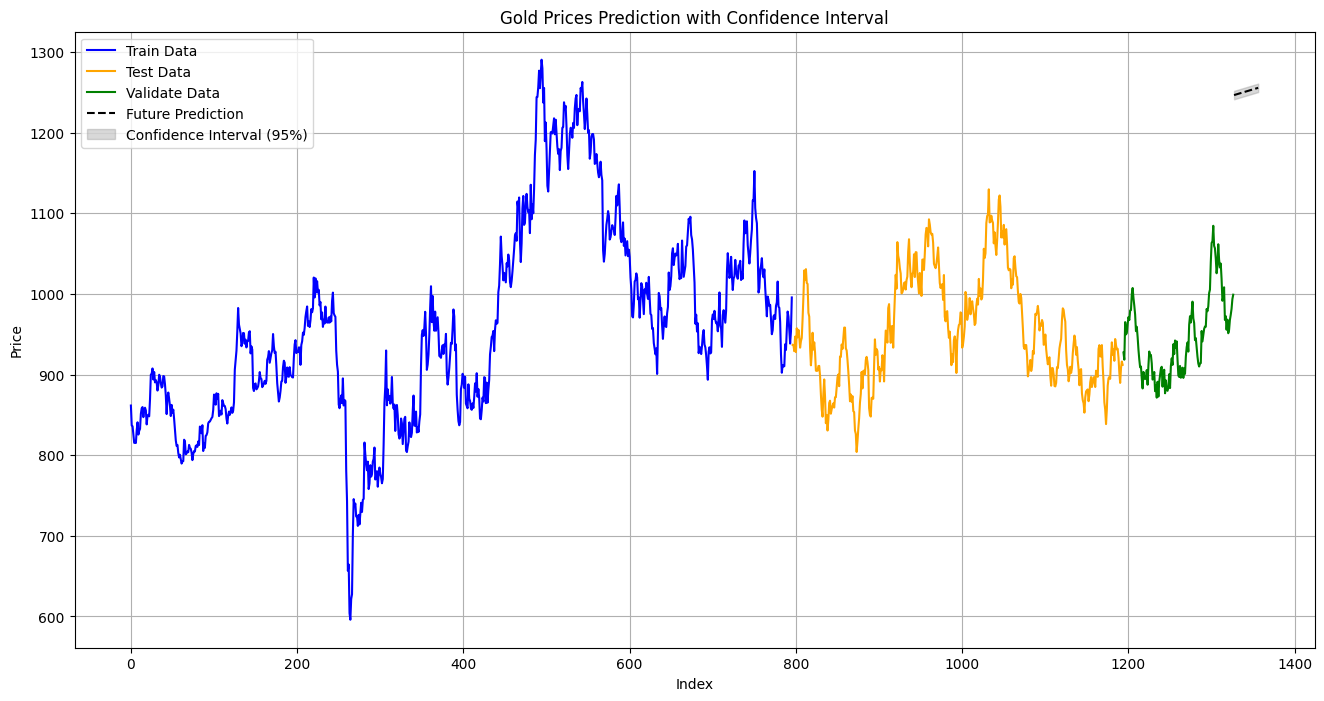

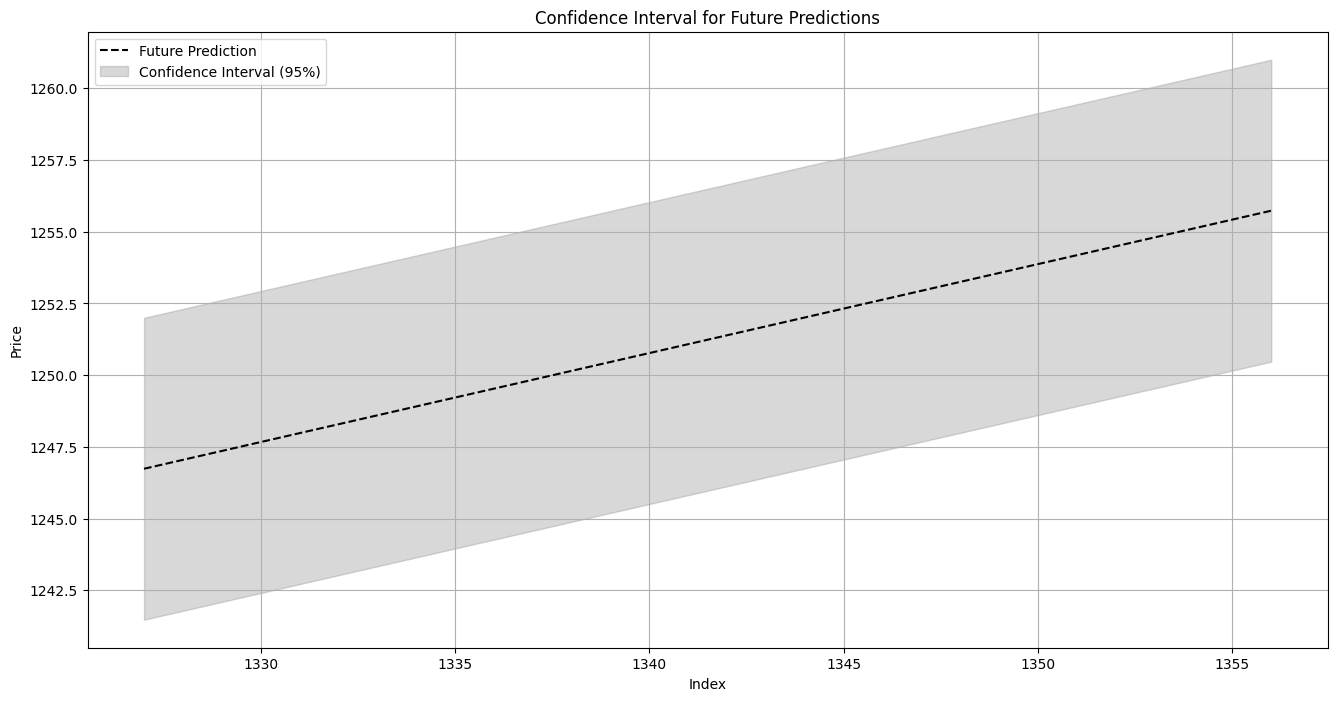

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tạo khoảng tin cậy cho dự đoán tương lai (30 ngày tiếp theo)
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Giá trị Z cho mức độ tin cậy 95%

# Sử dụng y_pred_future là giá trị dự đoán cho 30 ngày tiếp theo
y_pred_future = next_30_days['predicted_close'].values

# Độ lệch chuẩn của dự đoán tương lai
std_dev = np.std(y_pred_future)
margin_of_error = z_score * std_dev

# Tính khoảng tin cậy
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# In ra giá trị khoảng tin cậy
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Tính Confidence Score
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Cập nhật chỉ số index của next_30_days để nối tiếp tập val_data
last_index = val_data.index.max()  # Chỉ số cuối cùng của tập xác thực
next_30_days.index = range(last_index + 1, last_index + 1 + len(next_30_days))

# Tạo DataFrame khoảng tin cậy
PREDICTIONS_FUTURE = next_30_days.copy()
PREDICTIONS_FUTURE['lower_bound'] = lower_bound
PREDICTIONS_FUTURE['upper_bound'] = upper_bound

# Vẽ biểu đồ với khoảng tin cậy
plt.figure(figsize=(16, 8))

# Plot dữ liệu tập huấn luyện, kiểm tra, xác thực
plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')
plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')
plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot dự đoán tương lai
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['predicted_close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot khoảng tin cậy
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['lower_bound'], PREDICTIONS_FUTURE['upper_bound'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Thêm tiêu đề và chú thích
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ riêng cho khoảng tin cậy
plt.figure(figsize=(16, 8))

# Plot dự đoán tương lai
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['predicted_close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot khoảng tin cậy
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['lower_bound'], PREDICTIONS_FUTURE['upper_bound'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Thêm tiêu đề và chú thích
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend()
plt.grid()
plt.show()




In [27]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     69.61
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.79e-16
Time:                        22:46:41   Log-Likelihood:                -8007.9
No. Observations:                1327   AIC:                         1.602e+04
Df Residuals:                    1325   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.0017      5.549    165.075      0.0

I. Analyze Residuals (6:3:1)

1. Residual Plot

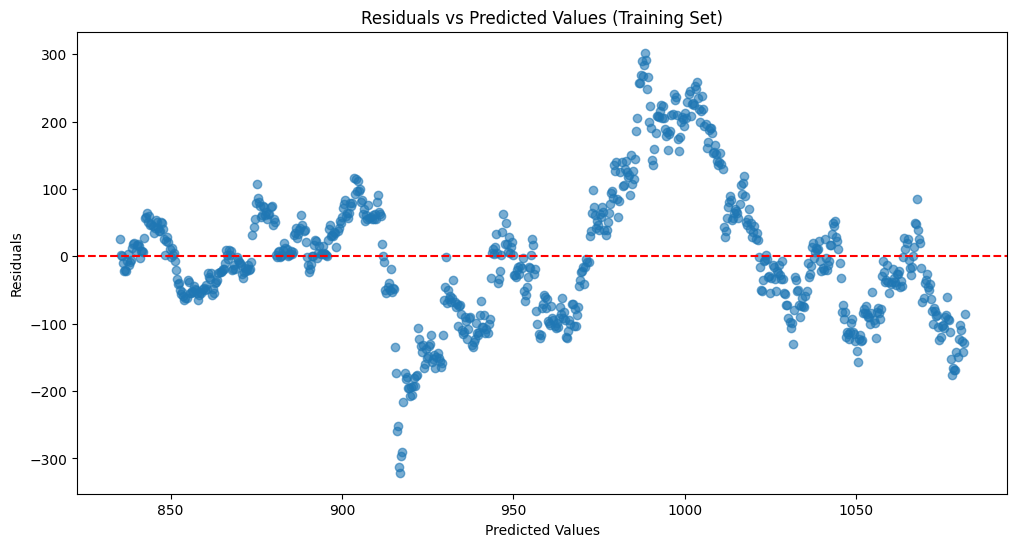

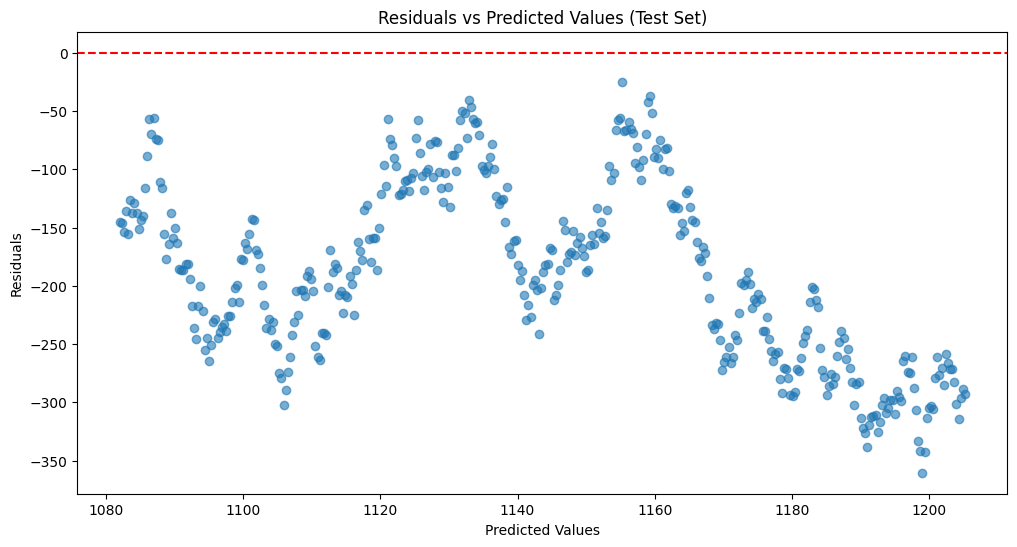

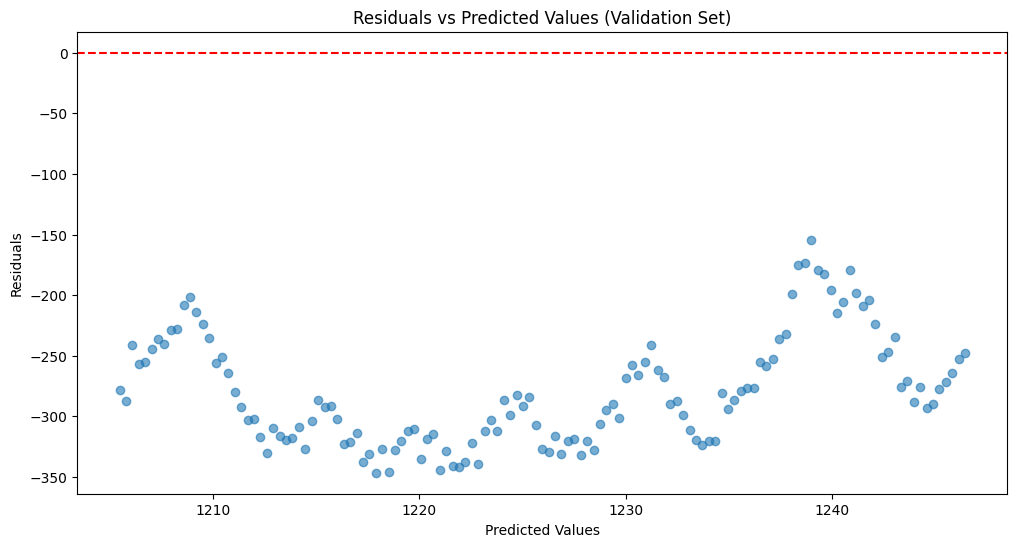

In [28]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOTS

<Figure size 800x600 with 0 Axes>

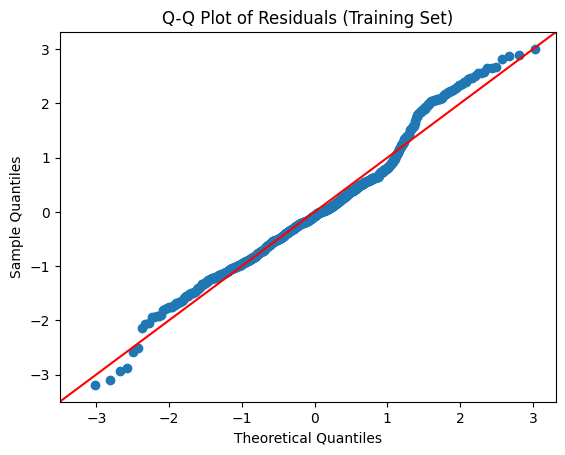

<Figure size 800x600 with 0 Axes>

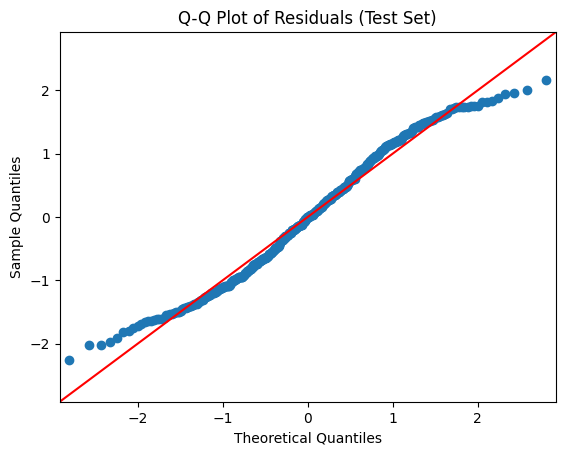

<Figure size 800x600 with 0 Axes>

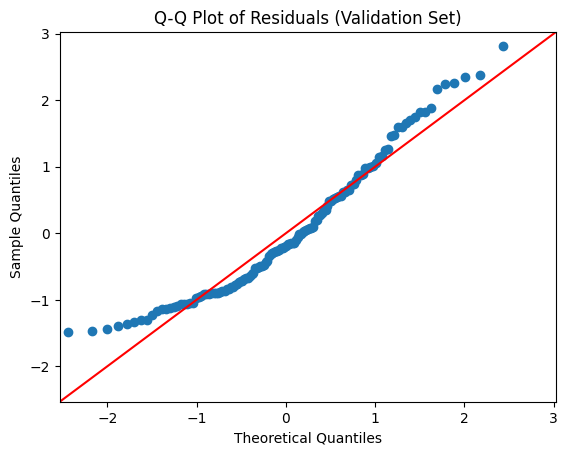

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [30]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.038217448699390734
Durbin-Watson statistic (Test Set): 0.007342518611947449
Durbin-Watson statistic (Validation Set): 0.002916573979912463


SPLITING DATA 5-3-2

In [31]:
# Split the data into training, testing, and validation sets (5:3:2)
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [32]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [33]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [34]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [35]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1328      1393.392262
1    1329      1393.837532
2    1330      1394.282802
3    1331      1394.728071
4    1332      1395.173341
5    1333      1395.618611
6    1334      1396.063881
7    1335      1396.509151
8    1336      1396.954421
9    1337      1397.399691
10   1338      1397.844961
11   1339      1398.290230
12   1340      1398.735500
13   1341      1399.180770
14   1342      1399.626040
15   1343      1400.071310
16   1344      1400.516580
17   1345      1400.961850
18   1346      1401.407120
19   1347      1401.852389
20   1348      1402.297659
21   1349      1402.742929
22   1350      1403.188199
23   1351      1403.633469
24   1352      1404.078739
25   1353      1404.524009
26   1354      1404.969279
27   1355      1405.414548
28   1356      1405.859818
29   1357      1406.305088


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 78.77007584063875
RMSE: 99.75288753070286
MAPE: 0.08375484501165092

Test Set Performance:
MAE: 206.09339972764636
RMSE: 221.25032371905374
MAPE: 0.21597917938430403

Validation Set Performance:
MAE: 398.37730783858404
RMSE: 401.728270494161
MAPE: 0.4288579170683922


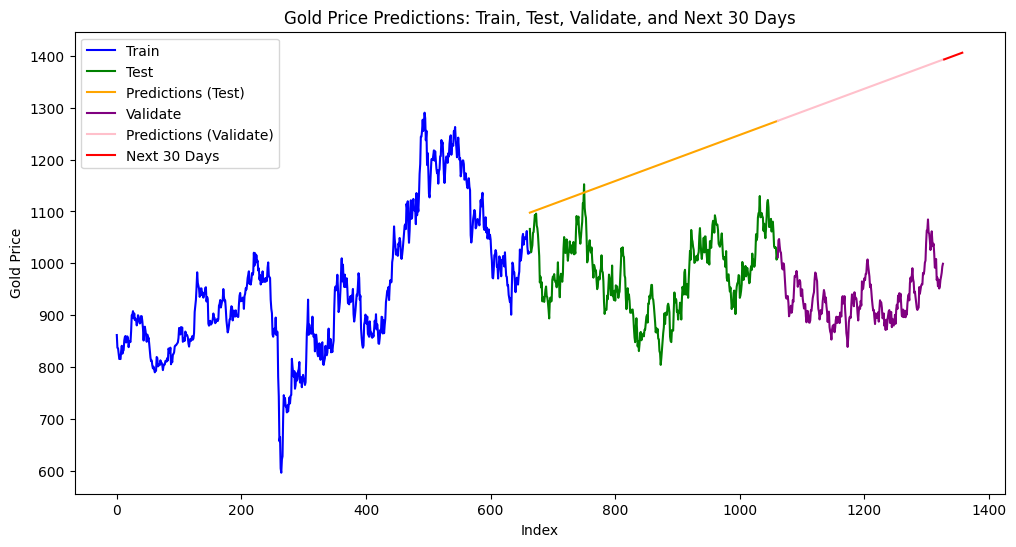

In [37]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


Margin of Error: 7.55371554952843
Lower Bound of Future Prediction: [1385.83854629 1386.28381616 1386.72908603 1387.17435591 1387.61962578
 1388.06489566 1388.51016553 1388.9554354  1389.40070528 1389.84597515
 1390.29124503 1390.7365149  1391.18178477 1391.62705465 1392.07232452
 1392.5175944  1392.96286427 1393.40813414 1393.85340402 1394.29867389
 1394.74394377 1395.18921364 1395.63448351 1396.07975339 1396.52502326
 1396.97029314 1397.41556301 1397.86083288 1398.30610276 1398.75137263]
Upper Bound of Future Prediction: [1400.94597739 1401.39124726 1401.83651713 1402.28178701 1402.72705688
 1403.17232676 1403.61759663 1404.0628665  1404.50813638 1404.95340625
 1405.39867613 1405.843946   1406.28921587 1406.73448575 1407.17975562
 1407.6250255  1408.07029537 1408.51556524 1408.96083512 1409.40610499
 1409.85137487 1410.29664474 1410.74191461 1411.18718449 1411.63245436
 1412.07772424 1412.52299411 1412.96826398 1413.41353386 1413.85880373]
Confidence Score: 0.9892078112664832


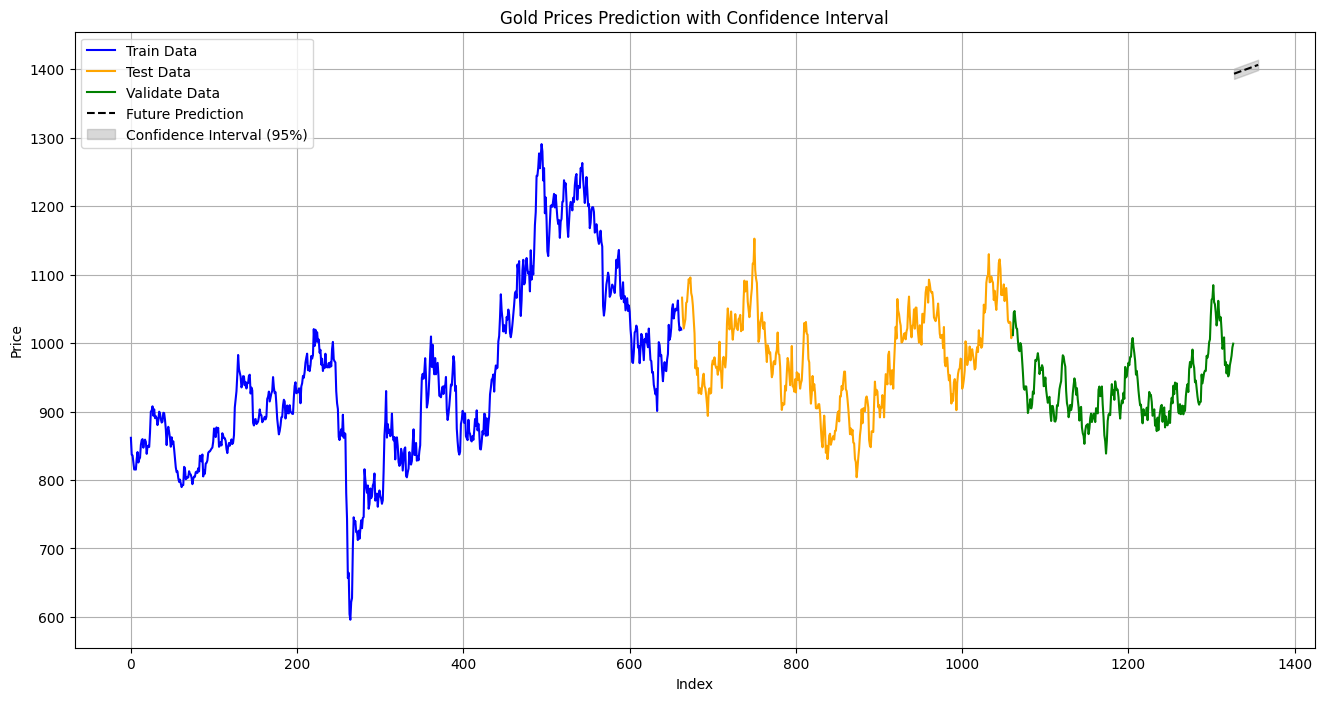

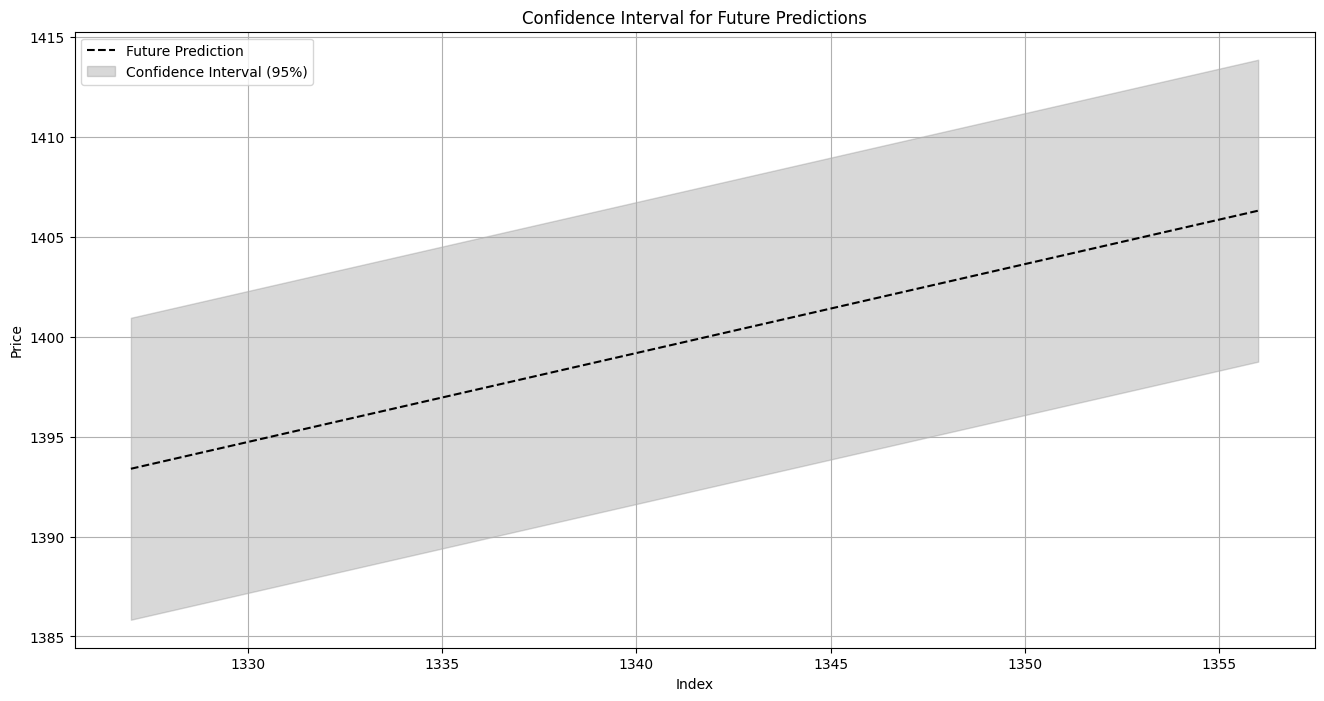

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tạo khoảng tin cậy cho dự đoán tương lai (30 ngày tiếp theo)
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Giá trị Z cho mức độ tin cậy 95%

# Sử dụng y_pred_future là giá trị dự đoán cho 30 ngày tiếp theo
y_pred_future = next_30_days['predicted_close'].values

# Độ lệch chuẩn của dự đoán tương lai
std_dev = np.std(y_pred_future)
margin_of_error = z_score * std_dev

# Tính khoảng tin cậy
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# In ra giá trị khoảng tin cậy
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Tính Confidence Score
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Cập nhật chỉ số index của next_30_days để nối tiếp tập val_data
last_index = val_data.index.max()  # Chỉ số cuối cùng của tập xác thực
next_30_days.index = range(last_index + 1, last_index + 1 + len(next_30_days))

# Tạo DataFrame khoảng tin cậy
PREDICTIONS_FUTURE = next_30_days.copy()
PREDICTIONS_FUTURE['lower_bound'] = lower_bound
PREDICTIONS_FUTURE['upper_bound'] = upper_bound

# Vẽ biểu đồ với khoảng tin cậy
plt.figure(figsize=(16, 8))

# Plot dữ liệu tập huấn luyện, kiểm tra, xác thực
plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')
plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')
plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot dự đoán tương lai
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['predicted_close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot khoảng tin cậy
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['lower_bound'], PREDICTIONS_FUTURE['upper_bound'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Thêm tiêu đề và chú thích
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ riêng cho khoảng tin cậy
plt.figure(figsize=(16, 8))

# Plot dự đoán tương lai
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['predicted_close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot khoảng tin cậy
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['lower_bound'], PREDICTIONS_FUTURE['upper_bound'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Thêm tiêu đề và chú thích
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend()
plt.grid()
plt.show()




In [39]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     69.61
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.79e-16
Time:                        22:46:42   Log-Likelihood:                -8007.9
No. Observations:                1327   AIC:                         1.602e+04
Df Residuals:                    1325   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.0017      5.549    165.075      0.0

I. Analyze Residuals (5:3:2)

1. Residual Plot

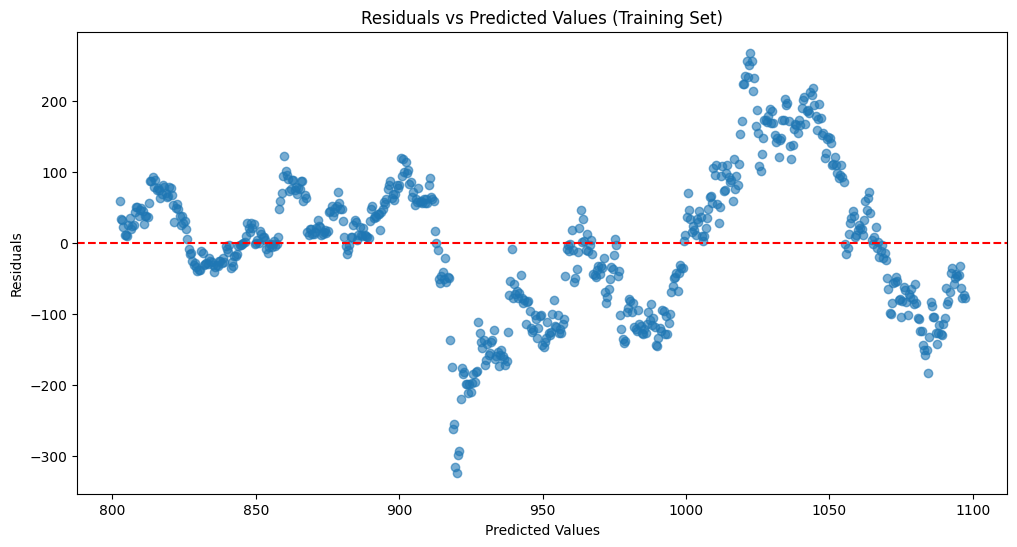

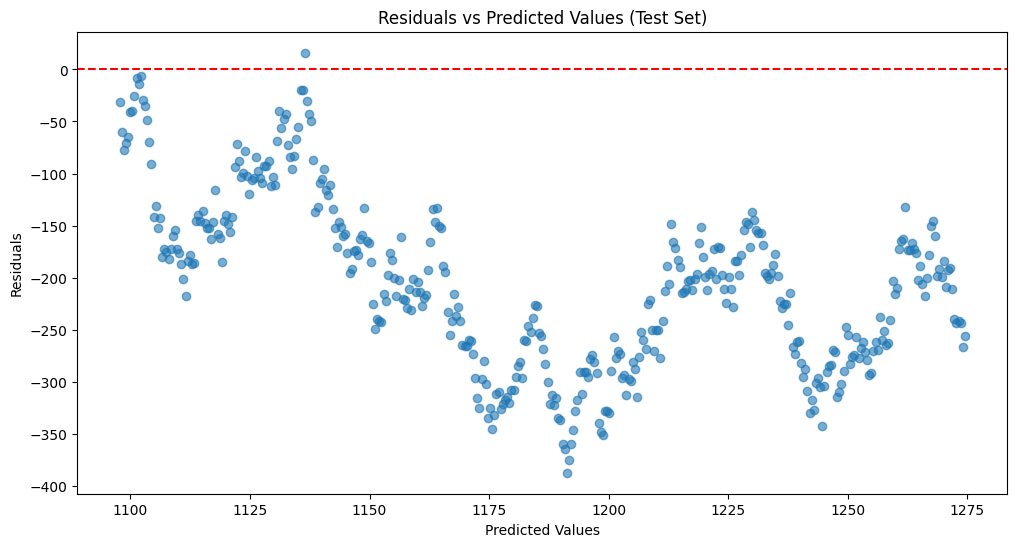

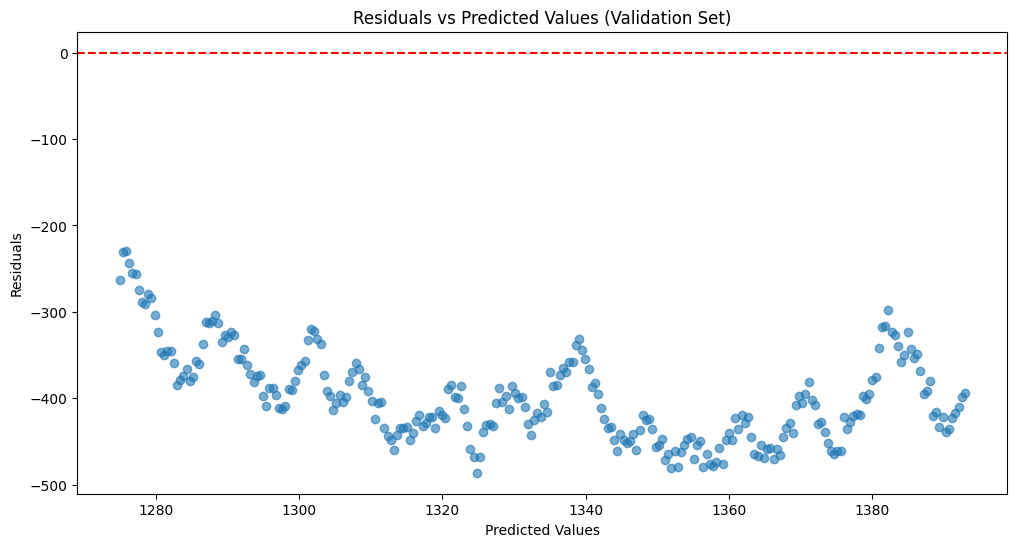

In [40]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()

2. Q-Q PLOTS:

<Figure size 800x600 with 0 Axes>

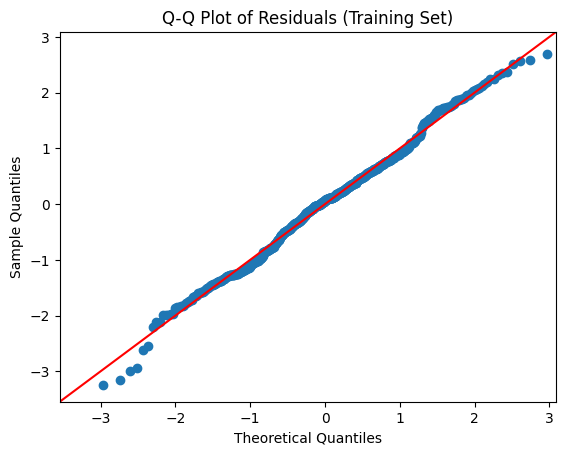

<Figure size 800x600 with 0 Axes>

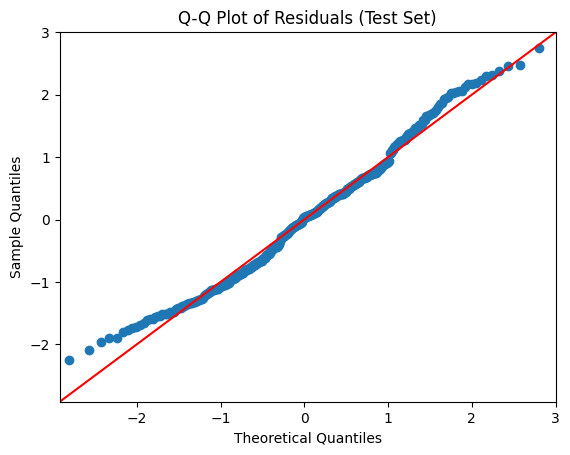

<Figure size 800x600 with 0 Axes>

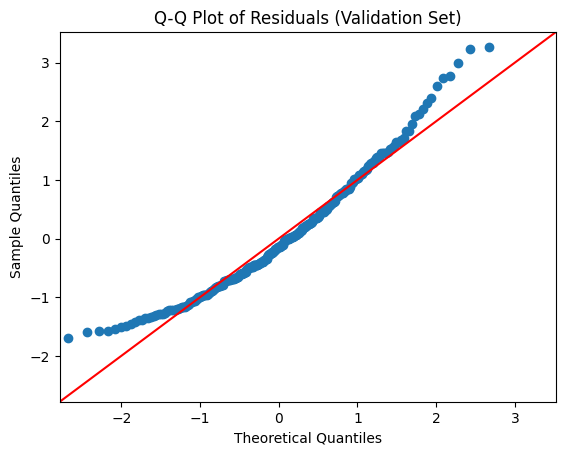

In [41]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()

3. Durbin-Watson:


In [42]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)

Durbin-Watson statistic (Training Set): 0.038475449511411214
Durbin-Watson statistic (Test Set): 0.007663245449858305
Durbin-Watson statistic (Validation Set): 0.0013617182879909816
